In [24]:
#Loading all the neceassary Libraries.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [25]:
#Loading the dataset
Employee_df=pd.read_csv("C:/Users/DELL/Downloads/train.csv")
Employee_df.head()

,ClaimNumber,DateTimeOfAccident,DateReported,Age,Gender,MaritalStatus,DependentChildren,DependentsOther,WeeklyWages,PartTimeFullTime,HoursWorkedPerWeek,DaysWorkedPerWeek,ClaimDescription,InitialIncurredCalimsCost,UltimateIncurredClaimCost
0,WC8285054,2002-04-09T07:00:00Z,2002-07-05T00:00:00Z,48,M,M,0,0,500.00,F,38.0,5,LIFTING TYRE INJURY TO RIGHT ARM AND WRIST INJURY,1500,4748.203388
1,WC6982224,1999-01-07T11:00:00Z,1999-01-20T00:00:00Z,43,F,M,0,0,509.34,F,37.5,5,STEPPED AROUND CRATES AND TRUCK TRAY FRACTURE ...,5500,6326.285819
2,WC5481426,1996-03-25T00:00:00Z,1996-04-14T00:00:00Z,30,M,U,0,0,709.10,F,38.0,5,CUT ON SHARP EDGE CUT LEFT THUMB,1700,2293.949087
3,WC9775968,2005-06-22T13:00:00Z,2005-07-22T00:00:00Z,41,M,S,0,0,555.46,F,38.0,5,DIGGING LOWER BACK LOWER BACK STRAIN,15000,17786.487170
4,WC2634037,1990-08-29T08:00:00Z,1990-09-27T00:00:00Z,36,M,M,0,0,377.10,F,38.0,5,REACHING ABOVE SHOULDER LEVEL ACUTE MUSCLE STR...,2800,4014.002925


In [26]:
#We can see that the first 3 columns (id,CaseNumber and time with date) will be unqiue for each entry and will not behelping our model to generalize the patterns
#So we will be removing those 3
Employee_df.drop(columns=Employee_df.columns[[0,1]],axis=1,inplace=True)
Employee_df

,DateReported,Age,Gender,MaritalStatus,DependentChildren,DependentsOther,WeeklyWages,PartTimeFullTime,HoursWorkedPerWeek,DaysWorkedPerWeek,ClaimDescription,InitialIncurredCalimsCost,UltimateIncurredClaimCost
0,2002-07-05T00:00:00Z,48,M,M,0,0,500.00,F,38.0,5,LIFTING TYRE INJURY TO RIGHT ARM AND WRIST INJURY,1500,4748.203388
1,1999-01-20T00:00:00Z,43,F,M,0,0,509.34,F,37.5,5,STEPPED AROUND CRATES AND TRUCK TRAY FRACTURE ...,5500,6326.285819
2,1996-04-14T00:00:00Z,30,M,U,0,0,709.10,F,38.0,5,CUT ON SHARP EDGE CUT LEFT THUMB,1700,2293.949087
3,2005-07-22T00:00:00Z,41,M,S,0,0,555.46,F,38.0,5,DIGGING LOWER BACK LOWER BACK STRAIN,15000,17786.487170
4,1990-09-27T00:00:00Z,36,M,M,0,0,377.10,F,38.0,5,REACHING ABOVE SHOULDER LEVEL ACUTE MUSCLE STR...,2800,4014.002925
...,...,...,...,...,...,...,...,...,...,...,...,...,...
53995,2004-09-08T00:00:00Z,32,F,S,0,0,500.00,F,38.0,5,STRUCK KNIFE LACERATED LEFT MIDDLE FINGER LEFT...,1000,480.493308
53996,2002-09-03T00:00:00Z,20,F,S,0,0,500.00,F,40.0,5,LEFT HAND LACERATION LEFT SIDE BACK AND LEFT LEG,1000,755.735319
53997,1992-03-18T00:00:00Z,19,M,S,0,0,283.00,F,40.0,5,METAL SLIPPED ACROSS METAL CUT FINGER,210,418.178461
53998,1995-01-31T00:00:00Z,24,M,S,0,0,200.00,F,38.0,5,BURN WHILST USING SPANNER LACERATION RIGHT MID...,7500,2695.225700


In [27]:
#Checking for Null Values
Employee_df.isna().sum()

DateReported                  0
Age                           0
Gender                        0
MaritalStatus                29
DependentChildren             0
DependentsOther               0
WeeklyWages                   0
PartTimeFullTime              0
HoursWorkedPerWeek            0
DaysWorkedPerWeek             0
ClaimDescription              0
InitialIncurredCalimsCost     0
UltimateIncurredClaimCost     0
dtype: int64

In [28]:
#Comparing with almost 56k values 29 is negligible so we remove it.
Employee_df.dropna(inplace=True)

In [29]:
#Overall Info about dataset
Employee_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53971 entries, 0 to 53999
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   DateReported               53971 non-null  object 
 1   Age                        53971 non-null  int64  
 2   Gender                     53971 non-null  object 
 3   MaritalStatus              53971 non-null  object 
 4   DependentChildren          53971 non-null  int64  
 5   DependentsOther            53971 non-null  int64  
 6   WeeklyWages                53971 non-null  float64
 7   PartTimeFullTime           53971 non-null  object 
 8   HoursWorkedPerWeek         53971 non-null  float64
 9   DaysWorkedPerWeek          53971 non-null  int64  
 10  ClaimDescription           53971 non-null  object 
 11  InitialIncurredCalimsCost  53971 non-null  int64  
 12  UltimateIncurredClaimCost  53971 non-null  float64
dtypes: float64(3), int64(5), object(5)
memory usage: 5.

In [30]:
#The Date column can be better if it is splitted into -year as this will provide a better overall understanding about the events that has happened across the years
#First Converting the column to date-time format then taking the year part only.
Employee_df['DateReported']=pd.to_datetime(Employee_df['DateReported'],utc=True)
Employee_df['Year_of_incident']=Employee_df['DateReported'].dt.year

In [31]:
Employee_df.head()

,DateReported,Age,Gender,MaritalStatus,DependentChildren,DependentsOther,WeeklyWages,PartTimeFullTime,HoursWorkedPerWeek,DaysWorkedPerWeek,ClaimDescription,InitialIncurredCalimsCost,UltimateIncurredClaimCost,Year_of_incident
0,2002-07-05 00:00:00+00:00,48,M,M,0,0,500.00,F,38.0,5,LIFTING TYRE INJURY TO RIGHT ARM AND WRIST INJURY,1500,4748.203388,2002
1,1999-01-20 00:00:00+00:00,43,F,M,0,0,509.34,F,37.5,5,STEPPED AROUND CRATES AND TRUCK TRAY FRACTURE ...,5500,6326.285819,1999
2,1996-04-14 00:00:00+00:00,30,M,U,0,0,709.10,F,38.0,5,CUT ON SHARP EDGE CUT LEFT THUMB,1700,2293.949087,1996
3,2005-07-22 00:00:00+00:00,41,M,S,0,0,555.46,F,38.0,5,DIGGING LOWER BACK LOWER BACK STRAIN,15000,17786.487170,2005
4,1990-09-27 00:00:00+00:00,36,M,M,0,0,377.10,F,38.0,5,REACHING ABOVE SHOULDER LEVEL ACUTE MUSCLE STR...,2800,4014.002925,1990


In [32]:
#ReArranging the df for better Understanding.
Employee_df_1=Employee_df[['Year_of_incident','Age','Gender','MaritalStatus','DependentChildren','DependentsOther','PartTimeFullTime','HoursWorkedPerWeek','DaysWorkedPerWeek','WeeklyWages','ClaimDescription','InitialIncurredCalimsCost','UltimateIncurredClaimCost']]
Employee_df_1.head()

,Year_of_incident,Age,Gender,MaritalStatus,DependentChildren,DependentsOther,PartTimeFullTime,HoursWorkedPerWeek,DaysWorkedPerWeek,WeeklyWages,ClaimDescription,InitialIncurredCalimsCost,UltimateIncurredClaimCost
0,2002,48,M,M,0,0,F,38.0,5,500.00,LIFTING TYRE INJURY TO RIGHT ARM AND WRIST INJURY,1500,4748.203388
1,1999,43,F,M,0,0,F,37.5,5,509.34,STEPPED AROUND CRATES AND TRUCK TRAY FRACTURE ...,5500,6326.285819
2,1996,30,M,U,0,0,F,38.0,5,709.10,CUT ON SHARP EDGE CUT LEFT THUMB,1700,2293.949087
3,2005,41,M,S,0,0,F,38.0,5,555.46,DIGGING LOWER BACK LOWER BACK STRAIN,15000,17786.487170
4,1990,36,M,M,0,0,F,38.0,5,377.10,REACHING ABOVE SHOULDER LEVEL ACUTE MUSCLE STR...,2800,4014.002925


In [33]:
#Looking at some of the columns
Employee_df_1['DependentChildren'].value_counts()

DependentChildren
0    50610
2     1361
1     1273
3      528
4      150
5       42
6        5
9        1
8        1
Name: count, dtype: int64

In [34]:
#Converting to either 0 or 1 as value is too much disturbed
def convert(value):
    if value>0:
        return 1
    else:
        return 0
Employee_df_1['DependentChildren']=Employee_df_1['DependentChildren'].apply(convert)

C:\Users\DELL\AppData\Local\Temp\ipykernel_5076\1873925337.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Employee_df_1['DependentChildren']=Employee_df_1['DependentChildren'].apply(convert)


In [35]:
Employee_df_1['DependentChildren'].value_counts()

DependentChildren
0    50610
1     3361
Name: count, dtype: int64

In [36]:
#Checking DependtOther Column
Employee_df_1['DependentsOther'].value_counts()

DependentsOther
0    53477
1      462
2       23
3        8
5        1
Name: count, dtype: int64

In [37]:
#Doing same for DependentOther column
Employee_df_1['DependentsOther']=Employee_df_1['DependentsOther'].apply(convert)
Employee_df_1['DependentsOther'].value_counts()

C:\Users\DELL\AppData\Local\Temp\ipykernel_5076\269397920.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Employee_df_1['DependentsOther']=Employee_df_1['DependentsOther'].apply(convert)


DependentsOther
0    53477
1      494
Name: count, dtype: int64

In [38]:
#EDA BEFORE_PREPROCESSING
#Does-Martial Status& Dependent Children have any influence on the Claim..?
Martial=Employee_df_1.groupby(['MaritalStatus','DependentChildren'])
Martial['InitialIncurredCalimsCost'].describe()

count          mean           std    min  \
MaritalStatus DependentChildren                                               
M             0                  19655.0   7942.317782  18204.316989    1.0   
              1                   2861.0  11099.457183  35432.999721    1.0   
S             0                  25724.0   6554.420191  19654.029920    1.0   
              1                    437.0  14586.597254  25662.034002  105.0   
U             0                   5231.0  11284.630281  20600.373653    1.0   
              1                     63.0  23646.984127  50902.139555    1.0   

                                    25%      50%      75%        max  
MaritalStatus DependentChildren                                       
M             0                   750.0   2800.0   9500.0   872980.0  
              1                   800.0   2872.0  10000.0   830000.0  
S             0                   550.0   1500.0   7500.0  2000000.0  
              1                  1000.0   3500.0  15000.0   215000.0  
U             0                  1000.0   5000.0  12000.0   310000.0  
              1                  1400.0  10000.0  22500.0   350000.0

<Axes: xlabel='Year_of_incident'>

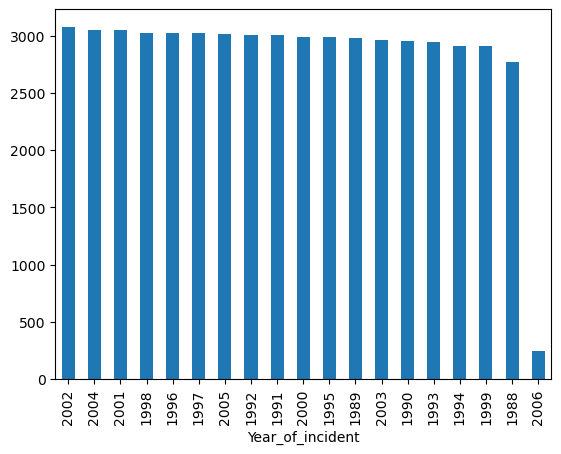

In [39]:
#Counting No of Incidents at Each Years to get idea about no of incidents across Years
Employee_df_1.value_counts('Year_of_incident',ascending=False).plot(kind='bar')

In [ ]:
#Gender data contains 13 unspecified Values,so removing it
Employee_df_1=Employee_df_1[Employee_df_1['Gender'].isin(['M','F'])]

([<matplotlib.patches.Wedge at 0x206363c5c40>,
 [Text(-0.8285374547882025, 0.7235507487475136, 'Male'),
  Text(0.9038590046360142, -0.7893281318554367, 'Female')],
 [Text(-0.45192952079356496, 0.394664044771371, '77.1%'),
  Text(0.5272510860376749, -0.46044141024900476, '22.9%')])

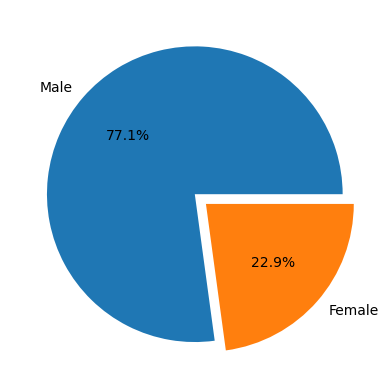

In [41]:
#Comparing GenderWise&Employment_type

Gender_wise=Employee_df_1['Gender'].value_counts()
Columns=['Male','Female']
explode=[0,0.1]
plt.pie(x=Gender_wise,labels=Columns,explode=explode,autopct='%1.1f%%')

([<matplotlib.patches.Wedge at 0x2063c425c40>,
 [Text(-1.0557713160240811, 0.30878297922777465, 'Parttime'),
  Text(1.1517505265717247, -0.33685415915757244, 'Fulltime')],
 [Text(-0.5758752632858624, 0.16842707957878614, '90.9%'),
  Text(0.6718544738335059, -0.1964982595085839, '9.1%')])

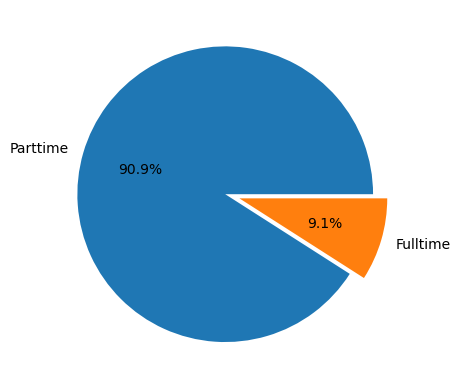

In [42]:
#Comparing Parttimr vs Fulltime employees
Employment_wise=Employee_df_1['PartTimeFullTime'].value_counts()
Columns=['Parttime','Fulltime']
explode=[0,0.1]
plt.pie(x=Employment_wise,labels=Columns,explode=explode,autopct='%1.1f%%')

Text(0.5, 28.999999999999986, 'Weekly-Pay')

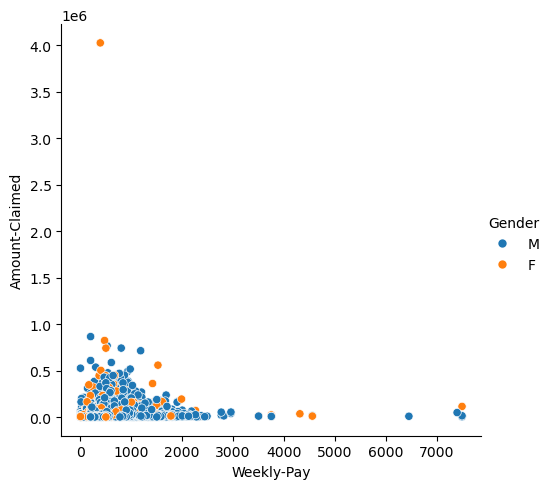

In [43]:
#Does Weeklypay & Claim amount have any correlaton..?
#x=Employee_df_1['WeeklyPay']
#y=Employee_df_1['UltimateIncurredClaimCost'] 
Gender=Employee_df_1['Gender']
sns.relplot(data=Employee_df_1,x='WeeklyWages',y='UltimateIncurredClaimCost',hue='Gender')
plt.ylabel('Amount-Claimed')
plt.xlabel('Weekly-Pay')

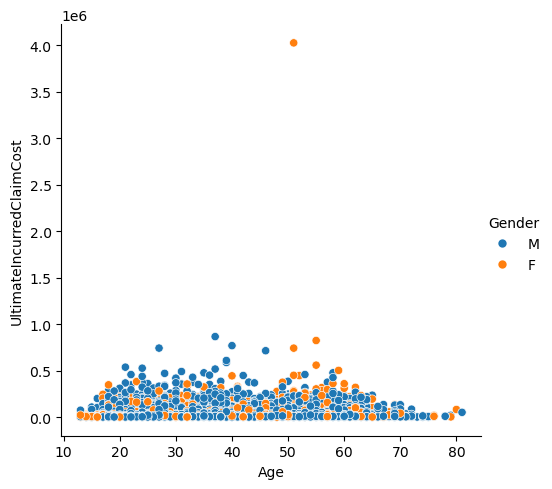

In [44]:
#Relation between Age and Amount Claim-Amount
sns.relplot(data=Employee_df_1,x='Age',y='UltimateIncurredClaimCost',hue='Gender')

<Axes: >

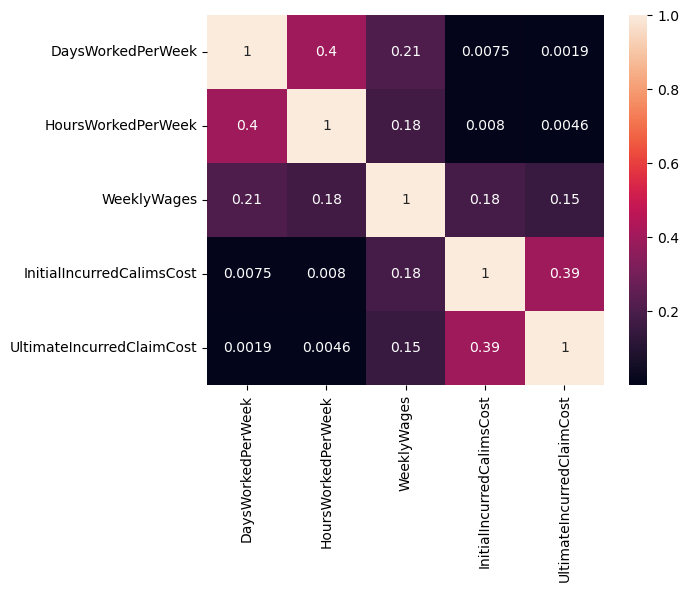

In [45]:
Corr_analysis=Employee_df_1[['DaysWorkedPerWeek','HoursWorkedPerWeek','WeeklyWages','InitialIncurredCalimsCost','UltimateIncurredClaimCost']].corr()
sns.heatmap(Corr_analysis,annot=True)


In [46]:
num_cols = Employee_df_1.select_dtypes(include='number').columns.tolist()
num_cols

['Year_of_incident',
 'Age',
 'DependentChildren',
 'DependentsOther',
 'HoursWorkedPerWeek',
 'DaysWorkedPerWeek',
 'WeeklyWages',
 'InitialIncurredCalimsCost',
 'UltimateIncurredClaimCost']

In [47]:
#Out of this we only need to check for outliers on some of the columns
import numpy as np
Outlier_Check=Employee_df_1[['HoursWorkedPerWeek','WeeklyWages','InitialIncurredCalimsCost','UltimateIncurredClaimCost']].columns.to_list()

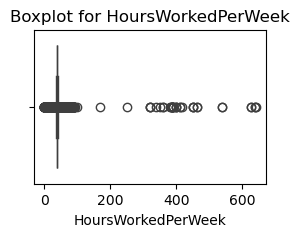

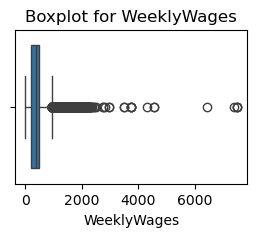

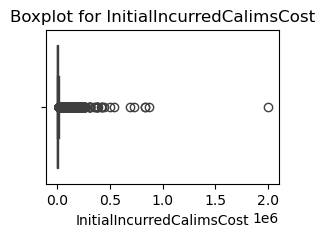

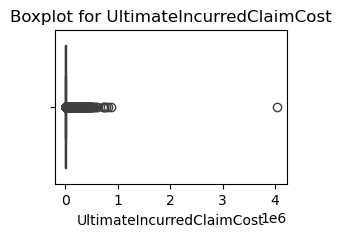

In [48]:
#Checking For Outliers

# Plot boxplots for each numeric column
for col in Outlier_Check:
    plt.figure(figsize=(3, 2))
    sns.boxplot(x=Employee_df_1[col])
    plt.title(f'Boxplot for {col}')
    plt.show()


In [49]:
def remove_outliers_iqr(df, cols):
    df_clean = df.copy()
    for col in cols:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Filter rows within the IQR range
        df_clean[col] = df_clean[col].clip(lower=lower_bound,upper=upper_bound)
    return df_clean


In [50]:
Employee_df_2 = remove_outliers_iqr(Employee_df_1, Outlier_Check)


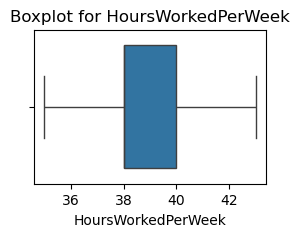

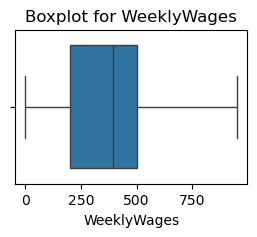

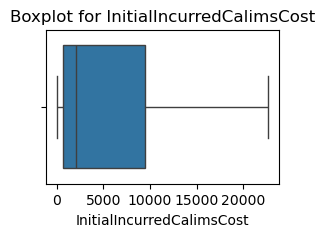

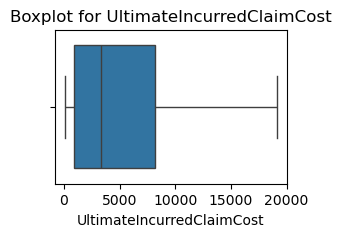

In [51]:
for col in Outlier_Check:
    plt.figure(figsize=(3, 2))
    sns.boxplot(x=Employee_df_2[col])
    plt.title(f'Boxplot for {col}')
    plt.show()

In [52]:
skew_vals = Employee_df_2[num_cols].skew().sort_values(ascending=False)
print(skew_vals)


DependentsOther              10.308450
DependentChildren             3.622784
InitialIncurredCalimsCost     1.416261
UltimateIncurredClaimCost     1.140175
WeeklyWages                   0.730497
Age                           0.536612
HoursWorkedPerWeek            0.172680
Year_of_incident             -0.008058
DaysWorkedPerWeek            -3.341849
dtype: float64


In [53]:
skewed_cols = ['InitialIncurredCalimsCost', 'UltimateIncurredClaimCost']
#For Columns like Dependents Others,Dependent Others value range is very short so no need to take care.
Employee_df_3 = Employee_df_2.copy()
Employee_df_3[skewed_cols] = np.log1p(Employee_df_3[skewed_cols])

In [54]:
Employee_df_3[skewed_cols].skew().sort_values(ascending=False)

InitialIncurredCalimsCost   -0.034333
UltimateIncurredClaimCost   -0.208862
dtype: float64

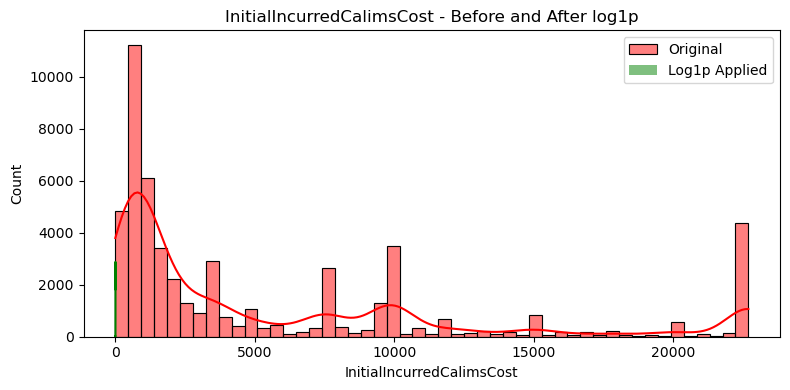

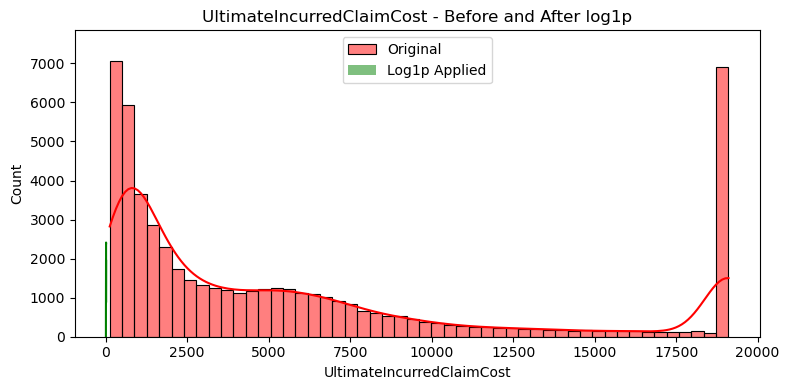

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

for col in skewed_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(Employee_df_2[col], kde=True, color='red', label='Original')
    sns.histplot(Employee_df_3[col], kde=True, color='green', label='Log1p Applied')
    plt.title(f'{col} - Before and After log1p')
    plt.legend()
    plt.tight_layout()
    plt.show()


In [56]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, FunctionTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

# Define column categories
categorical_cols = ['Gender', 'MaritalStatus','PartTimeFullTime']
text_col = 'ClaimDescription'
numeric_cols = ['Age', 'WeeklyWages', 'HoursWorkedPerWeek']


# Text pipeline for dealing with Claim Desciption columns
text_pipeline = Pipeline([
    ('selector', FunctionTransformer(lambda x: x[text_col], validate=False)),
    ('tfidf', TfidfVectorizer(max_features=200))
])

# Full column transformer
preprocessor = ColumnTransformer(transformers=[
    ('Categorical', OneHotEncoder(drop='first',sparse_output=False,handle_unknown='ignore'), categorical_cols),
    ('text', text_pipeline, [text_col]),
    ('numerical', StandardScaler(), numeric_cols)
],remainder='passthrough')


In [57]:
#Splitting Data to Train & Test
from sklearn.model_selection import train_test_split
X=Employee_df_3.drop(columns=['UltimateIncurredClaimCost'],axis=1)
y=Employee_df_3['UltimateIncurredClaimCost']

x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=0)

In [58]:
#transforming Through Column Transformer
x_train_transformed=preprocessor.fit_transform(x_train)
x_test_transformed=preprocessor.transform(x_test)